<a href="https://colab.research.google.com/github/prashun07/DS_Practiceproject07/blob/master/Pytorch_lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split
%matplotlib inline

# Use a white background for matplotlib figures
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [2]:
dataset = MNIST(root='data/', download=True, transform=ToTensor())

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [12]:
len(dataset)

60000

In [13]:
len(dataset[0])

2

In [19]:
dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

image.shape: torch.Size([1, 28, 28])
Label: 5


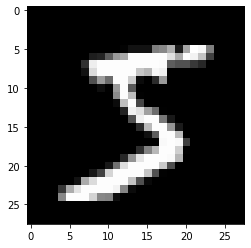

In [23]:
image, label = dataset[0]
print('image.shape:', image.shape)
plt.imshow(image.squeeze(), cmap='gray')
print('Label:', label)

In [26]:
val_size=10000
train_size=len(dataset)-val_size
train_ds,val_ds=random_split(dataset,[train_size,val_size])
len(train_ds),len(val_ds)

(50000, 10000)

In [27]:
batch_size=128

In Deep Learning we often use large dataset.so,loading and computing it is a slower process but pytorch give us DataLoader class inside torch.utils.data which can load the dataset automatically in memory in batches to computational and loading speed. 

In [29]:
train_loader=DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)
val_loader=DataLoader(val_ds,batch_size*2,num_workers=4,pin_memory=True)

images.shape: torch.Size([128, 1, 28, 28])


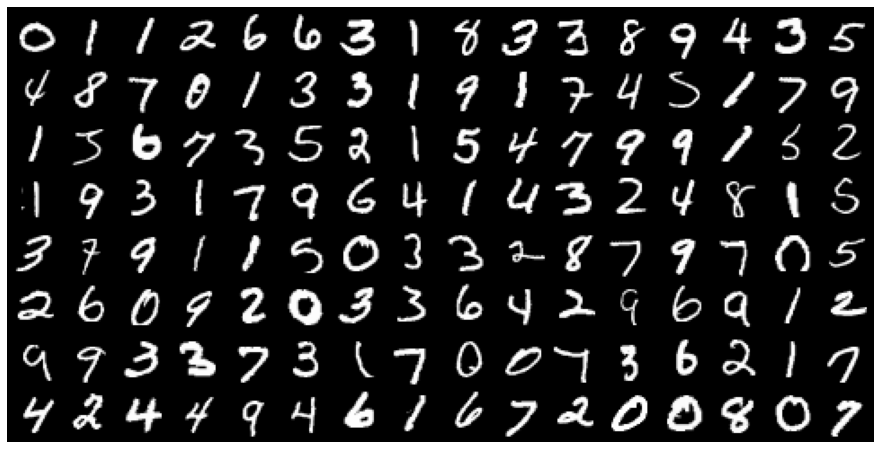

In [37]:
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [38]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = or x in outputs]
        epoch_acc = torch.stack(bat[x['val_acc'] fch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [39]:
#accuracy function it calculate accuracy by taking maximum prediction prob from each vector divide by actual target
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [40]:
input_size = 784
hidden_size = 32 # you can change this
num_classes = 10

In [41]:
model = MnistModel(input_size, hidden_size=32, out_size=num_classes)

In [47]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [48]:
device = get_default_device()
device

device(type='cuda')

In [49]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [50]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [51]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [52]:
for xb, yb in val_loader:
    print('xb.device:', xb.device)
    print('yb:', yb)
    break

xb.device: cuda:0
yb: tensor([3, 4, 0, 0, 4, 1, 1, 1, 4, 7, 0, 6, 1, 0, 2, 6, 6, 2, 4, 2, 4, 6, 9, 1,
        6, 3, 6, 2, 2, 4, 3, 9, 0, 9, 9, 0, 9, 8, 1, 5, 7, 1, 3, 8, 5, 5, 8, 8,
        4, 1, 5, 5, 9, 8, 4, 7, 6, 7, 1, 7, 3, 8, 9, 7, 4, 8, 8, 2, 7, 8, 6, 4,
        1, 5, 3, 8, 3, 2, 1, 3, 9, 2, 8, 0, 1, 8, 5, 5, 5, 0, 8, 7, 8, 1, 7, 1,
        9, 7, 8, 2, 4, 6, 5, 7, 9, 3, 9, 1, 8, 1, 3, 6, 0, 6, 7, 3, 8, 3, 2, 8,
        4, 0, 2, 1, 6, 6, 0, 5, 1, 2, 1, 9, 6, 2, 4, 3, 2, 3, 9, 0, 4, 8, 9, 2,
        0, 5, 1, 1, 2, 0, 2, 9, 6, 1, 6, 8, 9, 5, 8, 7, 1, 4, 6, 9, 7, 6, 4, 8,
        2, 7, 8, 1, 0, 9, 5, 0, 3, 8, 7, 3, 7, 2, 2, 3, 8, 1, 9, 4, 2, 9, 3, 7,
        5, 3, 4, 0, 5, 9, 1, 1, 1, 7, 9, 2, 0, 0, 9, 4, 1, 2, 6, 3, 8, 8, 8, 6,
        0, 4, 6, 0, 0, 5, 3, 0, 7, 6, 8, 6, 4, 9, 7, 0, 9, 0, 9, 9, 1, 3, 9, 9,
        8, 5, 3, 1, 3, 0, 6, 4, 7, 8, 4, 6, 1, 1, 1, 7], device='cuda:0')


In [53]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [54]:
# Model (on GPU)
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [56]:
history = [evaluate(model, val_loader)]
history

[{'val_acc': 0.10771484673023224, 'val_loss': 2.3074052333831787}]

In [57]:
history += fit(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.2257, val_acc: 0.9331
Epoch [1], val_loss: 0.2029, val_acc: 0.9392
Epoch [2], val_loss: 0.1507, val_acc: 0.9557
Epoch [3], val_loss: 0.1538, val_acc: 0.9544
Epoch [4], val_loss: 0.1659, val_acc: 0.9481


In [58]:
history += fit(5, 0.5, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1406, val_acc: 0.9581
Epoch [1], val_loss: 0.1454, val_acc: 0.9578
Epoch [2], val_loss: 0.1222, val_acc: 0.9656
Epoch [3], val_loss: 0.1349, val_acc: 0.9589
Epoch [4], val_loss: 0.1239, val_acc: 0.9624


In [60]:
history += fit(5, 0.1, model, train_loader, val_loader)

Epoch [0], val_loss: 0.1125, val_acc: 0.9688
Epoch [1], val_loss: 0.1125, val_acc: 0.9697
Epoch [2], val_loss: 0.1144, val_acc: 0.9688
Epoch [3], val_loss: 0.1159, val_acc: 0.9685
Epoch [4], val_loss: 0.1142, val_acc: 0.9686


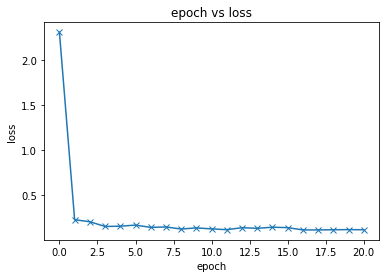

In [62]:
losses=[x['val_loss']for x in history]
plt.plot(losses,'-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('epoch vs loss');

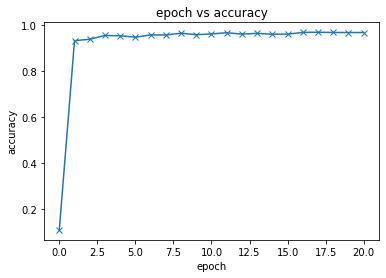

In [63]:
losses=[x['val_acc']for x in history]
plt.plot(losses,'-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('epoch vs accuracy');

In [64]:
test_dataset = MNIST(root='data/',train=False, transform=ToTensor())

In [65]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: data/
    Split: Test
    StandardTransform
Transform: ToTensor()

In [71]:
def predict_image(img,model):
  xb=to_device(img.unsqueeze(0),device)
  yb=model(xb)
  _,preds=torch.max(yb,dim=1)
  return preds[0].item()

Label: 7 Predicted 7


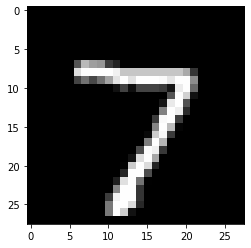

In [72]:
image,label=test_dataset[0]
plt.imshow(image[0],cmap='gray')
print('Label:',label,'Predicted',predict_image(image,model))

In [73]:
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(model, 'pytorchlesson.pkl') 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['pytorchlesson.pkl']

In [74]:
model_from_joblib = joblib.load('pytorchlesson.pkl') 